# Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
#importing my basic libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading my dataset
df = pd.read_csv("titanic_train.csv")

In [3]:
#first 10 records
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#dropping my nominal datatypes
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)

In [5]:
#Shape of my dataset after dropping
df.shape

(891, 9)

In [6]:
#info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [7]:
#filling missing values
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna(df["Cabin"].mode()[0] , inplace=True)
df['Embarked'].fillna(df["Embarked"].mode()[0] , inplace=True)

In [8]:
#checking info again after trating missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Univariate Analysis

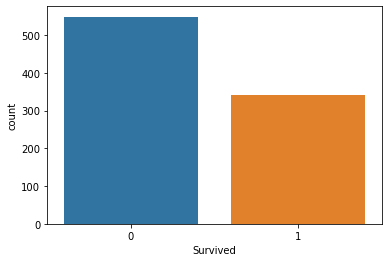

In [9]:
sns.countplot(df['Survived'])
#by this we got that we have imbalance data will be treating this later on

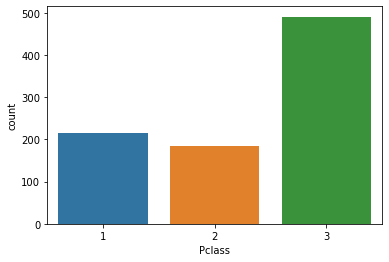

In [10]:
sns.countplot(df['Pclass'])

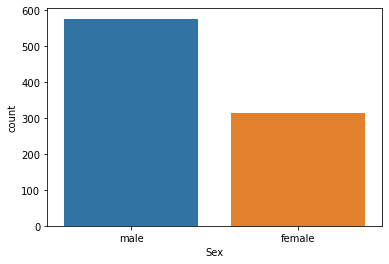

In [11]:
sns.countplot(df['Sex'])

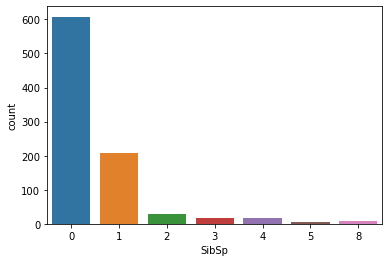

In [12]:
sns.countplot(df['SibSp'])

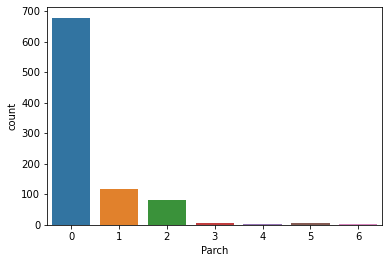

In [13]:
sns.countplot(df['Parch'])

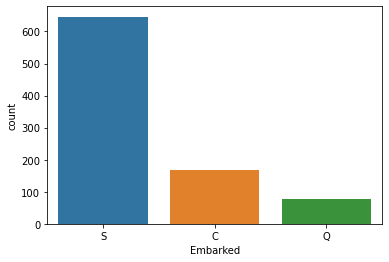

In [14]:
sns.countplot(df['Embarked'])

In [15]:
df_Survived = df.loc[df["Survived"]==1]
df_UnSurvived = df.loc[df["Survived"]==0]

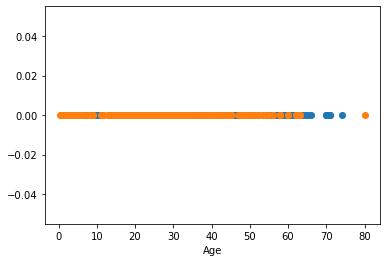

In [16]:
plt.plot(df_UnSurvived['Age'],np.zeros_like(df_UnSurvived['Age']),'o')
plt.plot(df_Survived['Age'],np.zeros_like(df_Survived['Age']),'o')
plt.xlabel("Age")
plt.show()

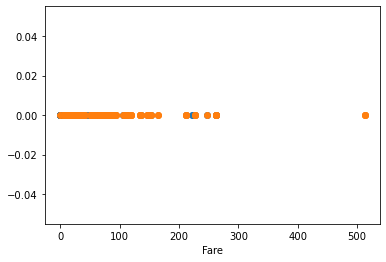

In [17]:
plt.plot(df_UnSurvived['Fare'],np.zeros_like(df_UnSurvived['Fare']),'o')
plt.plot(df_Survived['Fare'],np.zeros_like(df_Survived['Fare']),'o')
plt.xlabel("Fare")
plt.show()

# Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


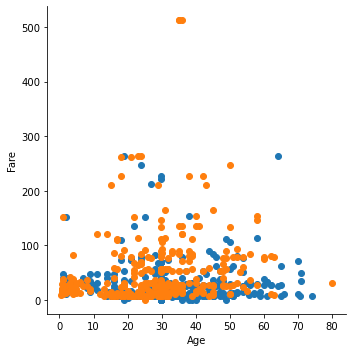

In [18]:
sns.FacetGrid(df,hue="Survived",size=5).map(plt.scatter,"Age","Fare")
plt.show()

In [19]:
df.shape

(891, 9)

# MultiVariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


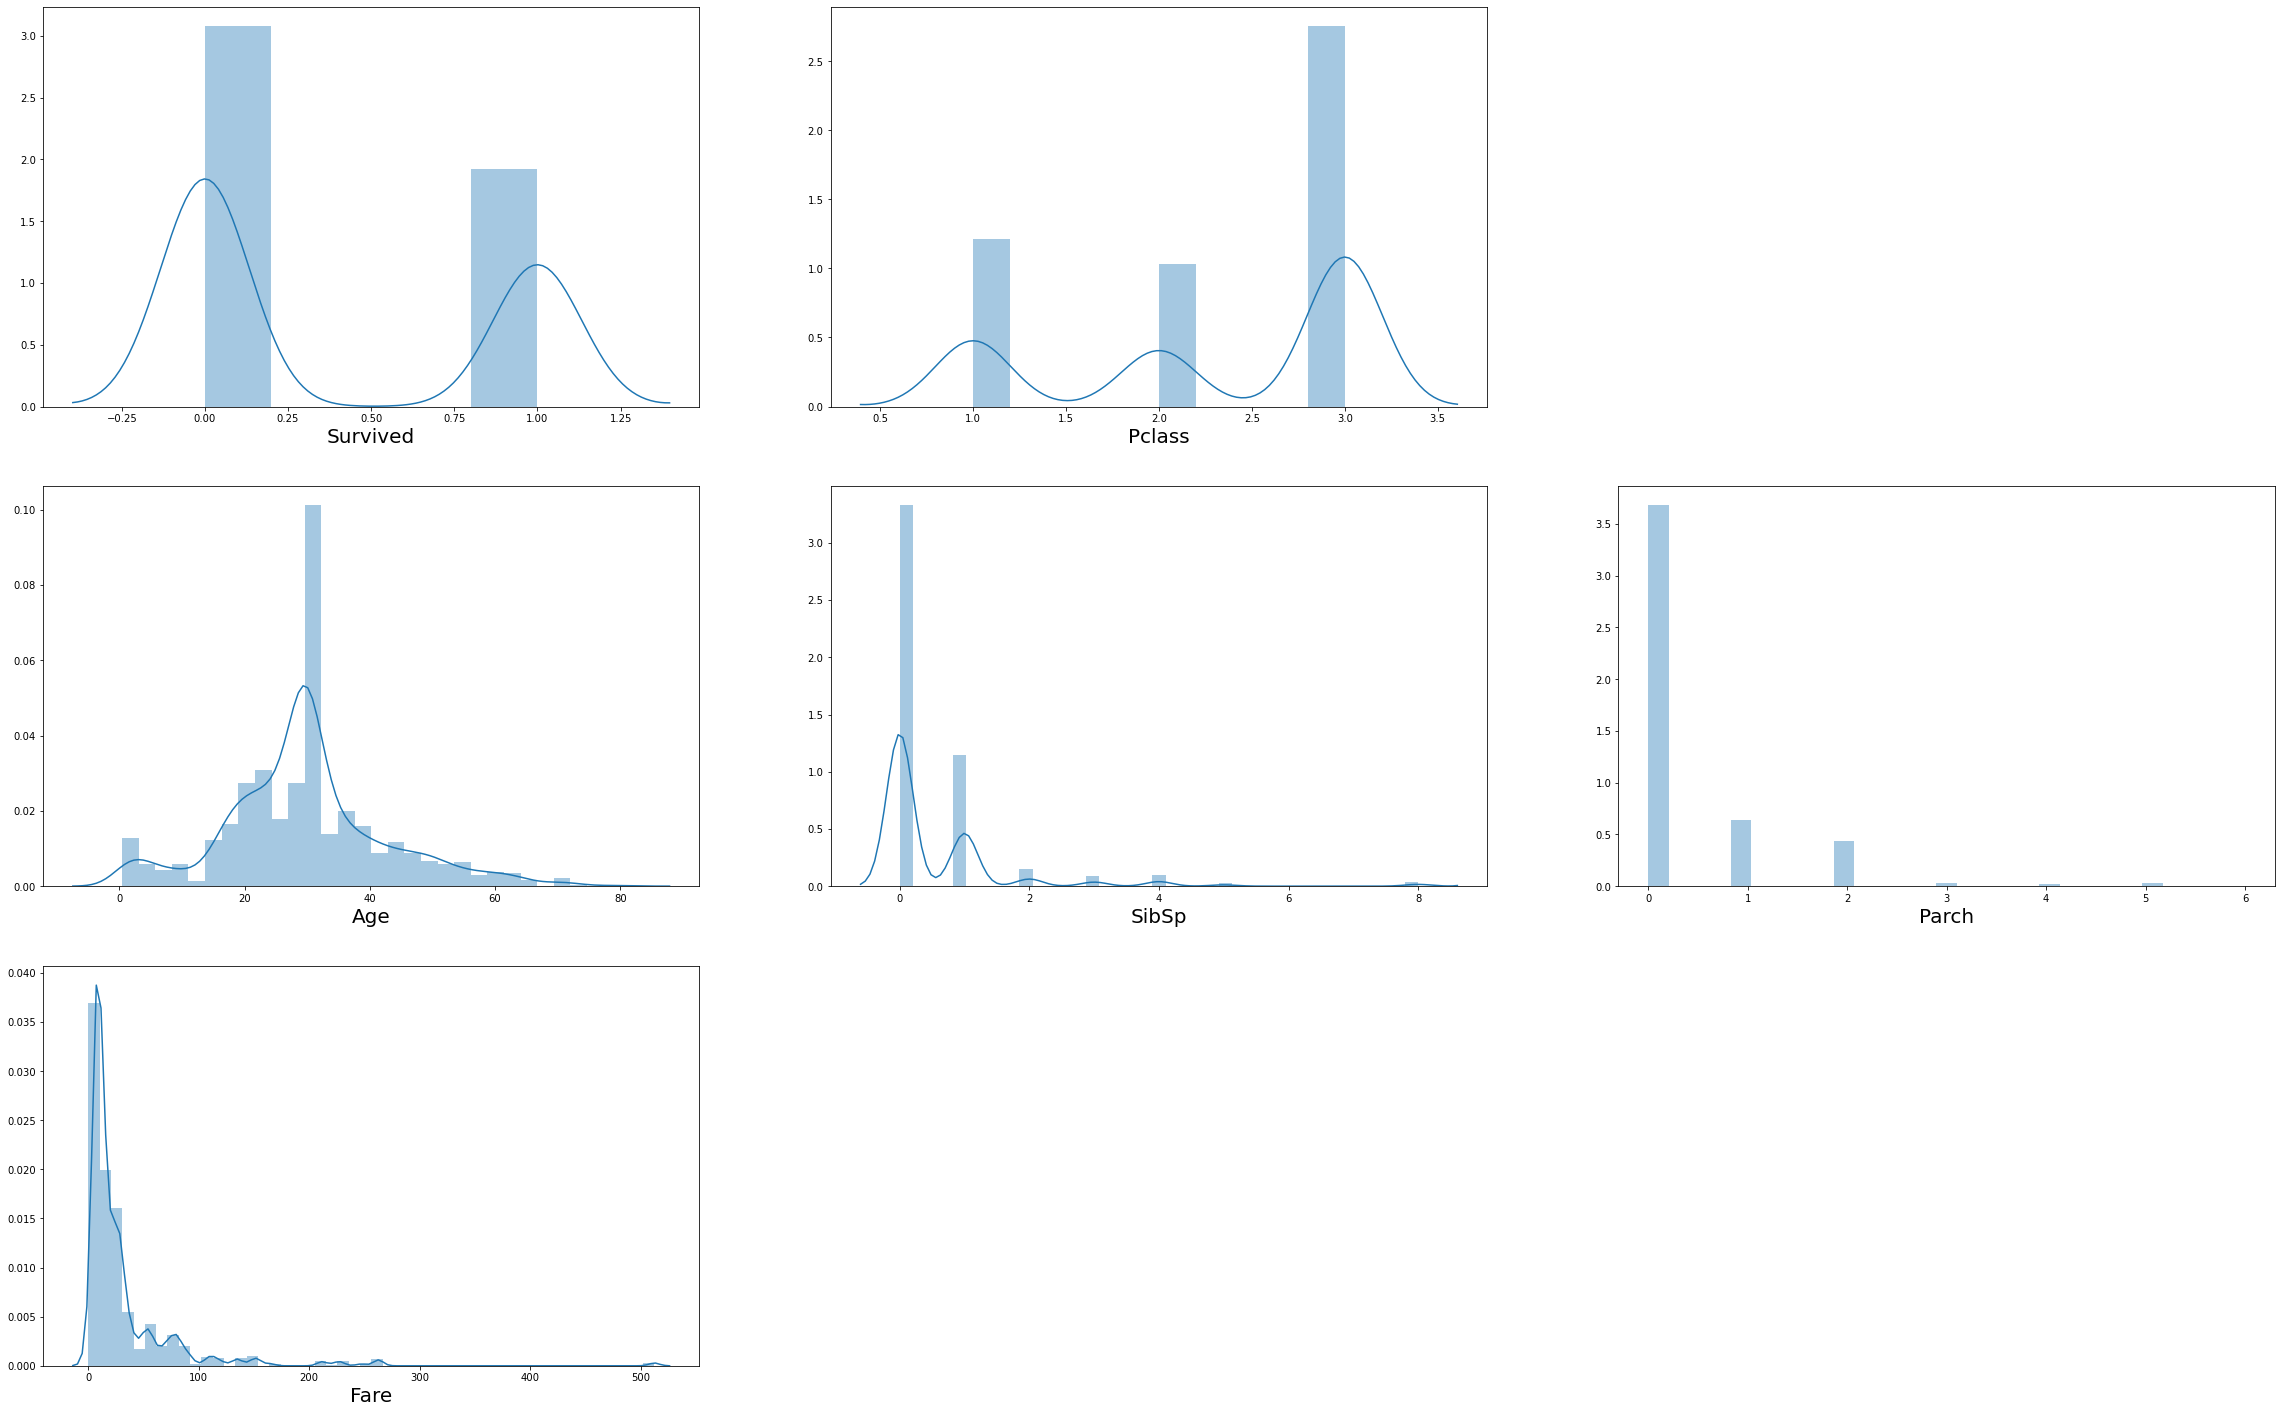

In [20]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

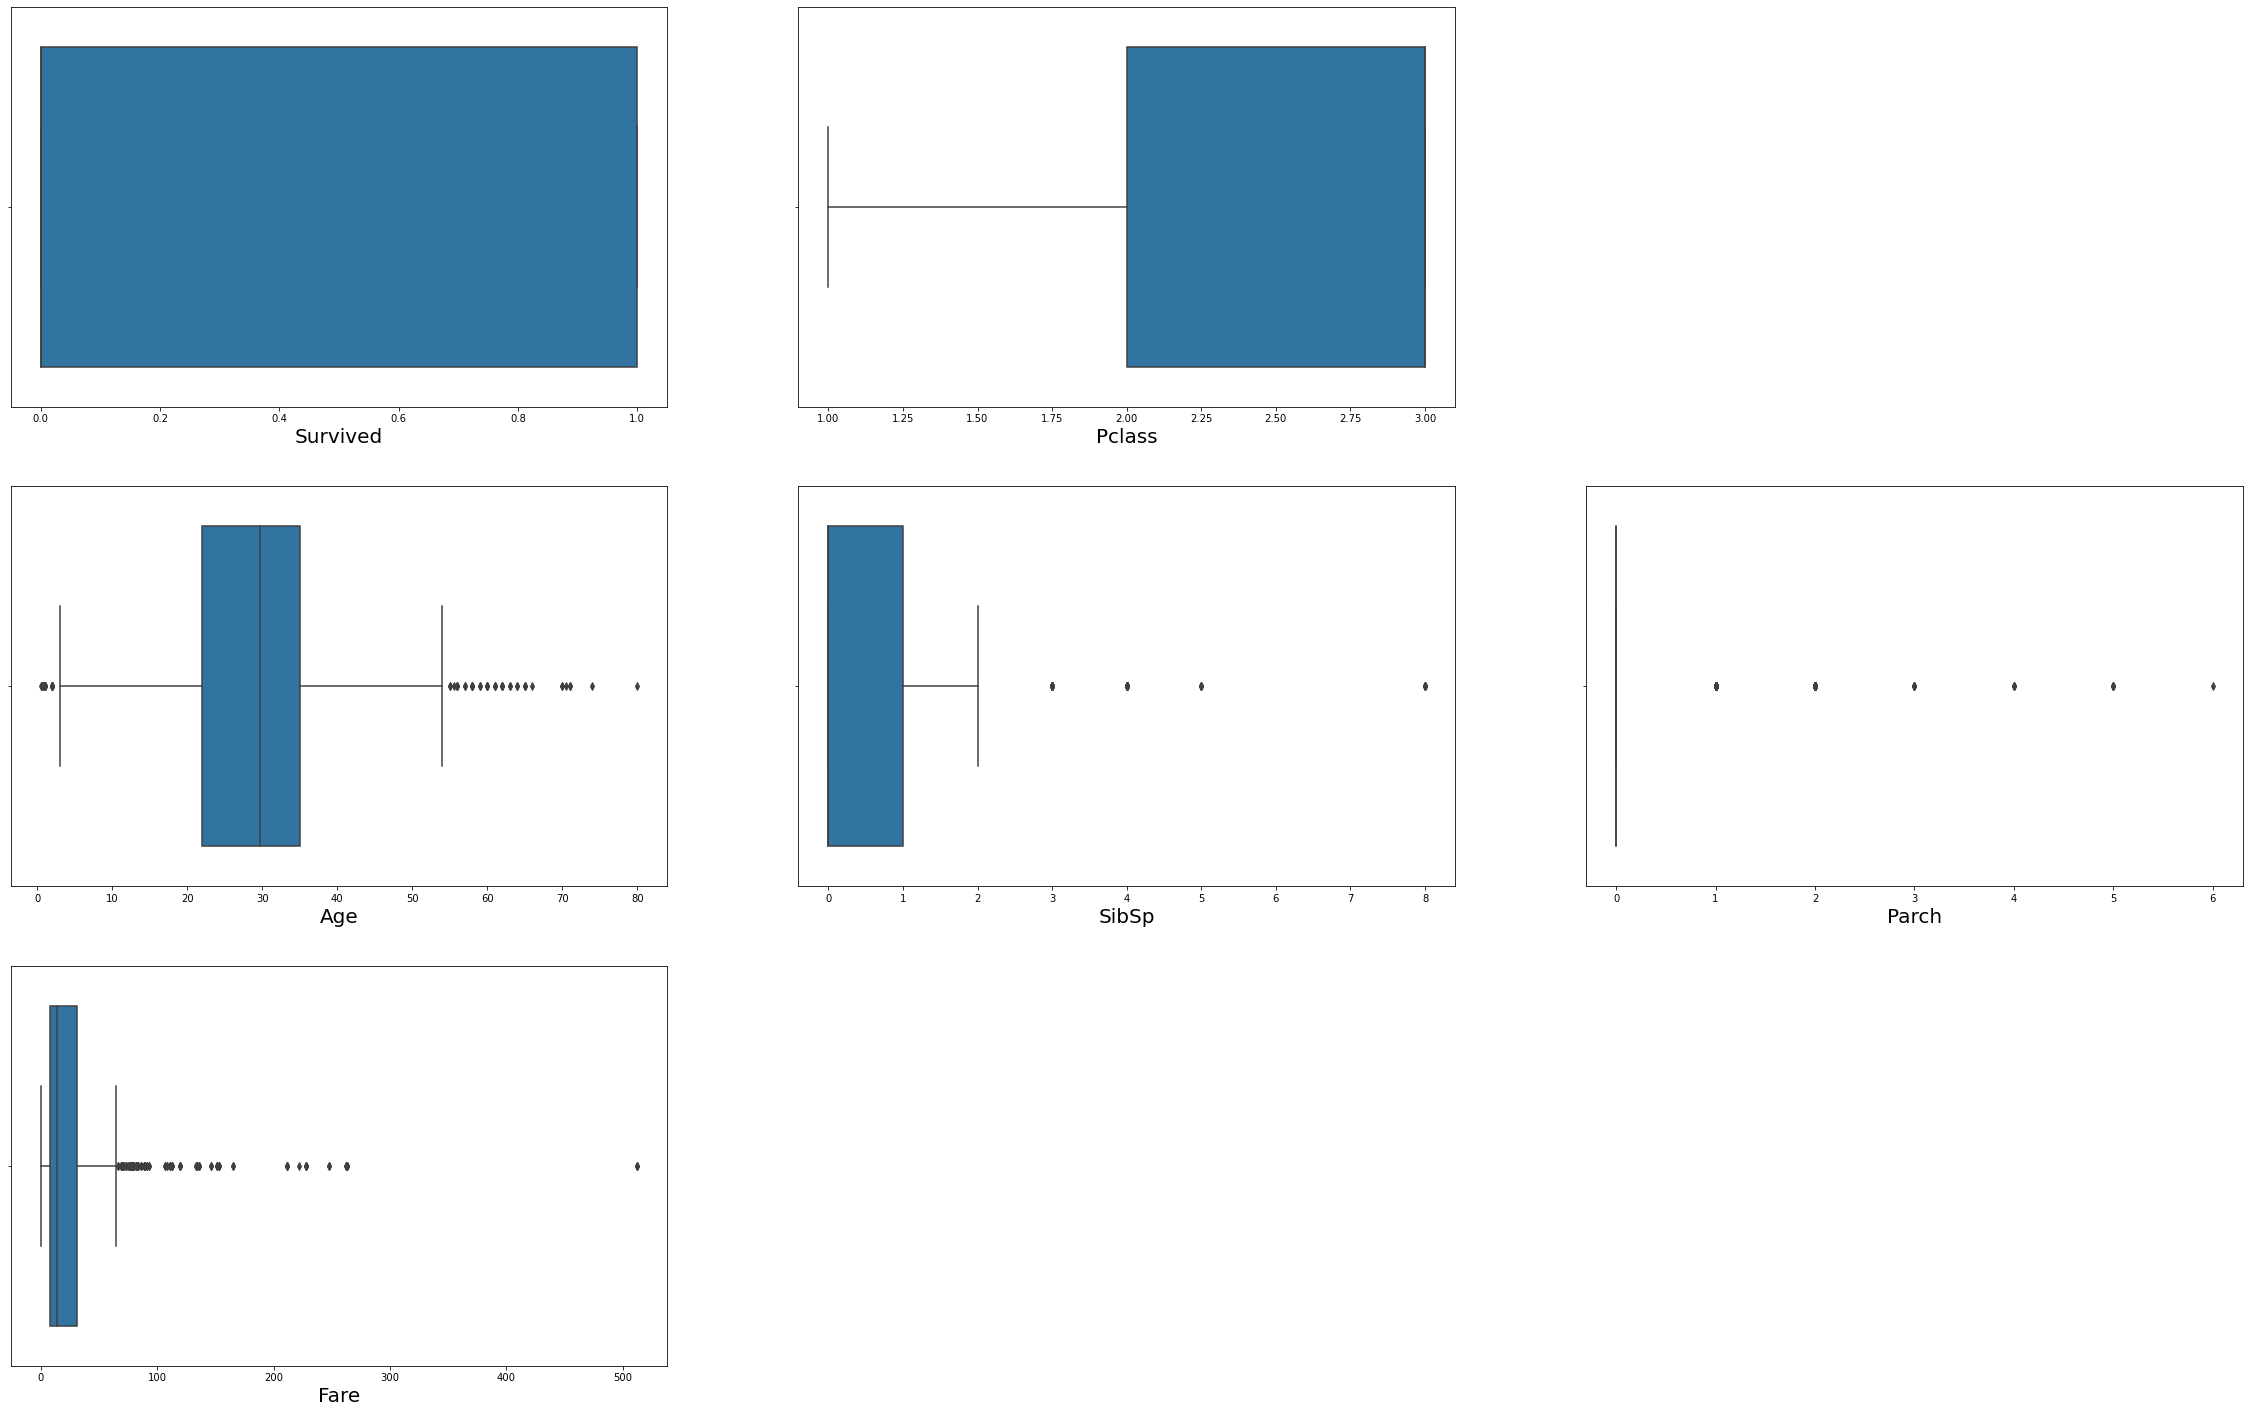

In [21]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [22]:
#just to check correlation of the data between features
corr_mat = df.corr()

In [23]:
corr_mat

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

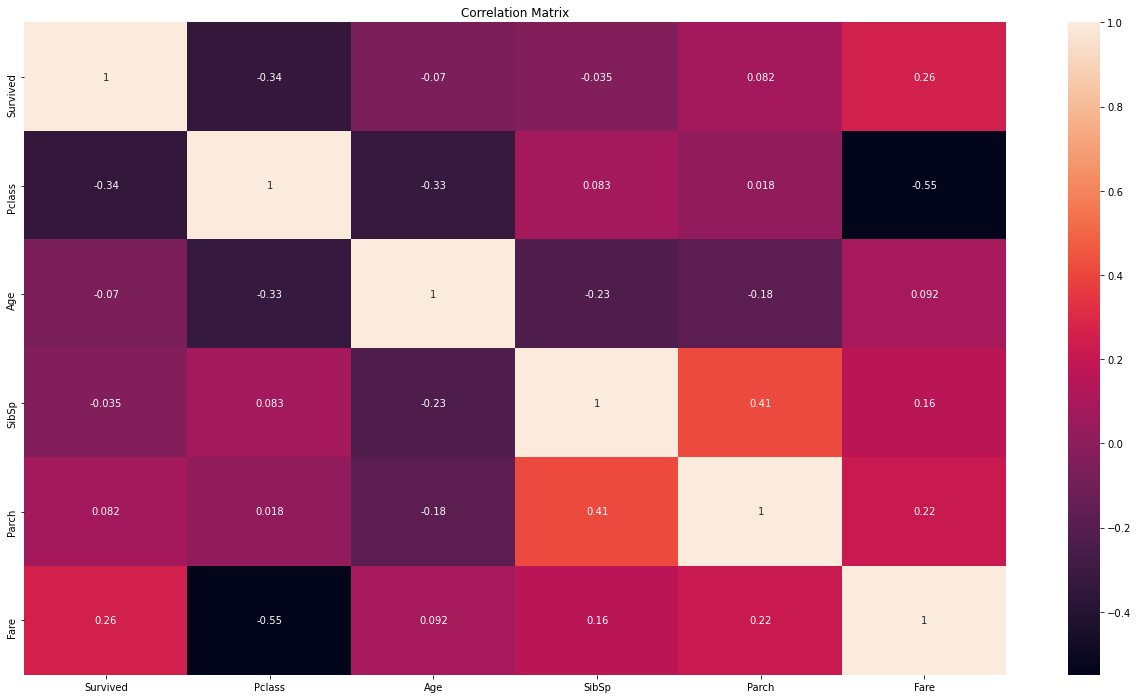

In [24]:
#Visualising heatmap for corr_mat and concluded that  all our features are not corelated
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show

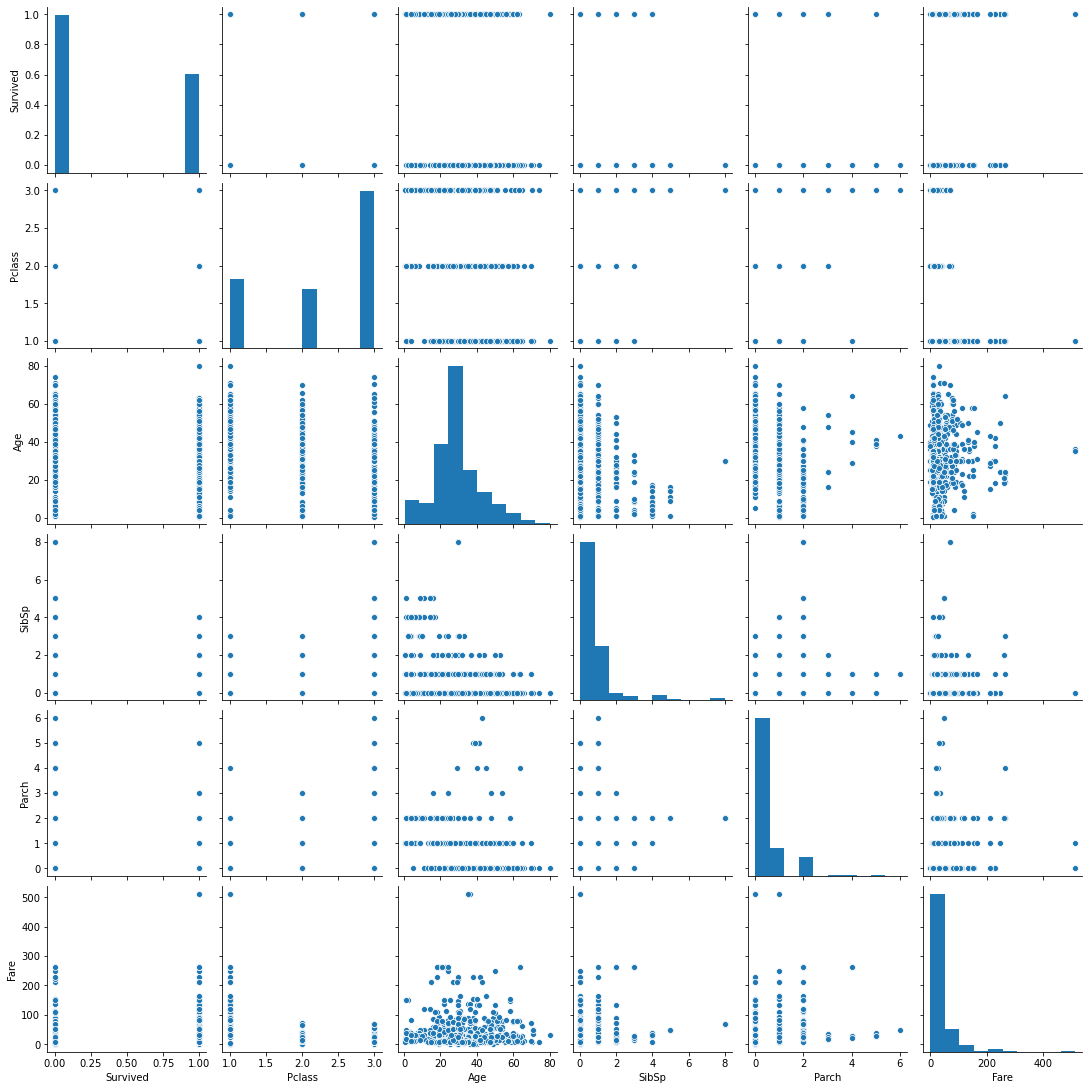

In [25]:
sns.pairplot(df)

In [26]:
df.skew().to_frame('Skewness measure').T #for measure of skewness

,Survived,Pclass,Age,SibSp,Parch,Fare
Skewness measure,0.478523,-0.630548,0.434488,3.695352,2.749117,4.787317


In [27]:
#by using label_encoder i have converted my Sex,Cabin and Embarked columns from object to numeric
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Cabin']= label_encoder.fit_transform(df['Cabin'])
df['Embarked']= label_encoder.fit_transform(df['Embarked'])


In [28]:
#Removing Outliers
from scipy import stats

z = np.abs(stats.zscore(df))
index = (np.where(z > 3)[0])

df = df.drop(df.index[index])

In [29]:
#Checking shape after removing outliers
df.shape

(786, 9)

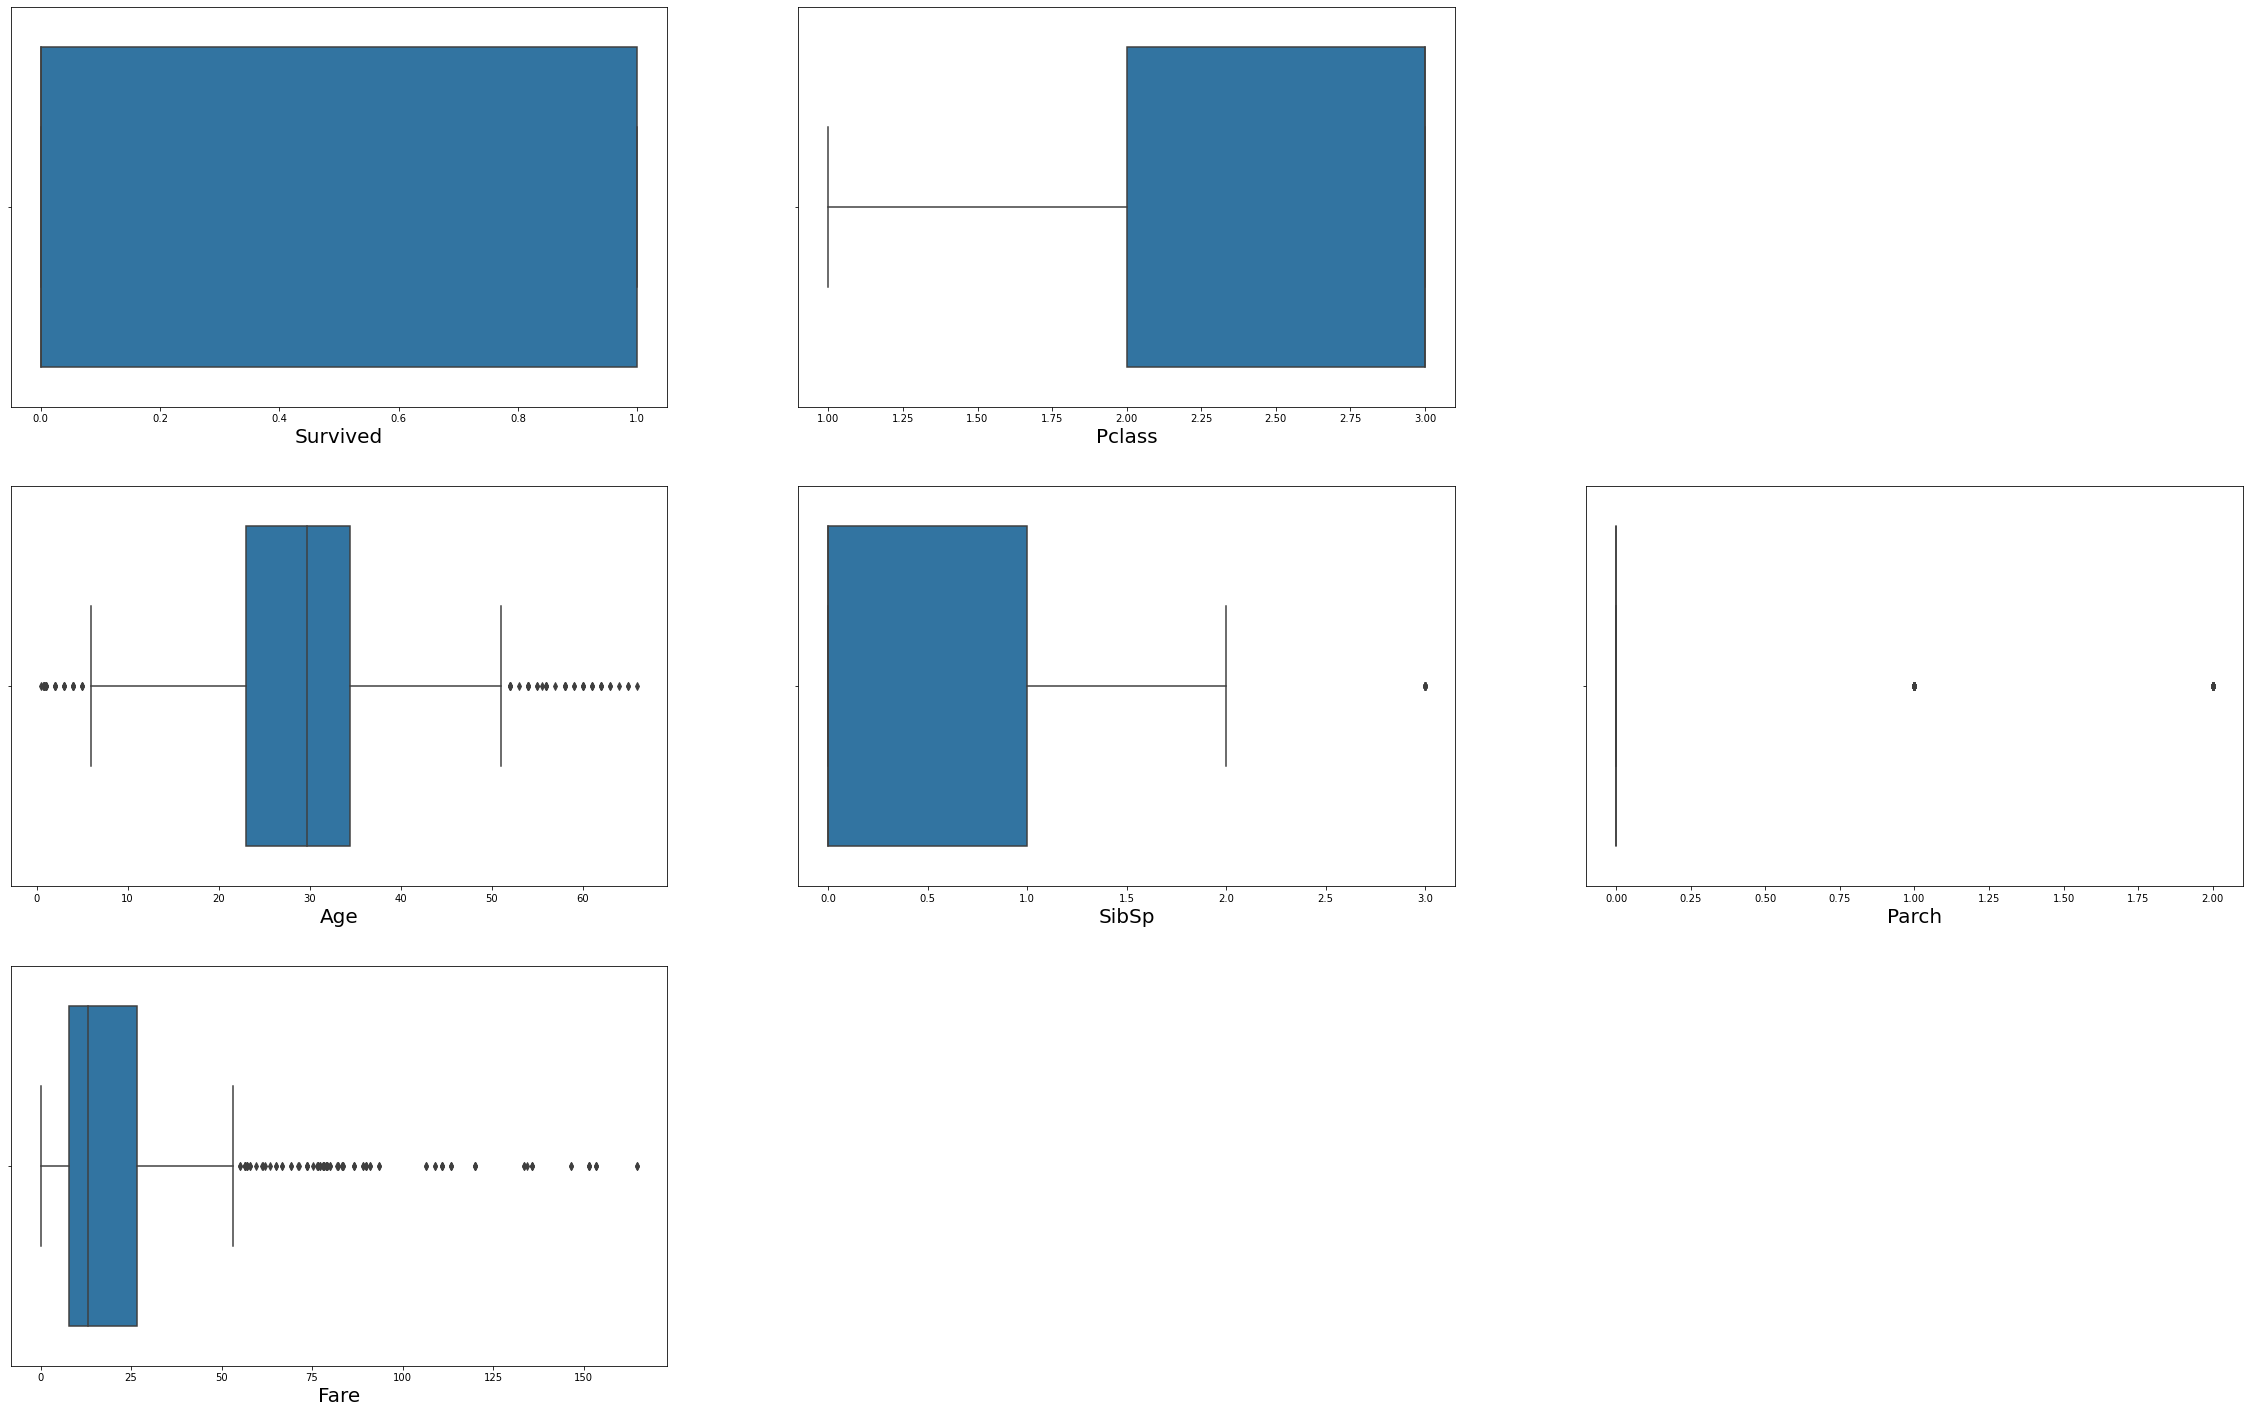

In [30]:
#plotting distribution plot for my dataframe removing outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [31]:
#importing packages to build my first algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices


In [32]:
#seperating my features and label
X = df.drop('Survived',axis=1)
y = df['Survived']


In [33]:
# to scale my features.
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [34]:
#splitting my data set for training and testing
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=1)

In [35]:
#handling imbalance dataset issue
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 338, 1: 212})
The number of classes after fit Counter({0: 338, 1: 253})


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [36]:
#checking for is there any VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [37]:
vif

,VIF,Features
0,2.155217,Pclass
1,1.135476,Sex
2,1.235072,Age
3,1.184877,SibSp
4,1.271729,Parch
5,2.278137,Fare
6,1.102860,Cabin
7,1.047760,Embarked


In [38]:
#Buliding first model
logic_r = LogisticRegression(solver='liblinear') #Instantiate the LogisticRegression object
logic_r.fit(X_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = logic_r.predict(X_test) #Predict  

In [39]:
#metrics to be validate my logistic regression
print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print('-'*40)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[126  21]
 [ 27  62]]
----------------------------------------
Accuracy of Logistic Regression :0.80
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       147
           1       0.75      0.70      0.72        89

    accuracy                           0.80       236
   macro avg       0.79      0.78      0.78       236
weighted avg       0.79      0.80      0.80       236

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [40]:
#builiding KNN classifier and metrics to be validate my logistic regression
from sklearn.neighbors import KNeighborsClassifier
# k=3
knn = KNeighborsClassifier(n_neighbors = 3)  #Instantiate KNN with k=3
knn.fit(X_train,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print('-'*30)
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_pred)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[126  21]
 [ 27  62]]
------------------------------
Accuracy of KNN :0.80
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       147
           1       0.75      0.70      0.72        89

    accuracy                           0.80       236
   macro avg       0.79      0.78      0.78       236
weighted avg       0.79      0.80      0.80       236

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [41]:
#Bulding SVC and metrics to be validated
from sklearn.svm import SVC
svc = SVC()  #Instantiate SVC
svc.fit(X_train_ns,y_train_ns) #Call the fit method of SVC to train the model or to learn the parameters of model
predicted_svc = svc.predict(X_test) #Predict 

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc)) #for confusion matrix
print('-'*30)
SVC_accuracy = accuracy_score(y_test,predicted_svc) #for accuracy score
print('Accuracy of SVC :',SVC_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_svc)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[128  19]
 [ 22  67]]
------------------------------
Accuracy of SVC : 0.826271186440678
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       147
           1       0.78      0.75      0.77        89

    accuracy                           0.83       236
   macro avg       0.82      0.81      0.81       236
weighted avg       0.83      0.83      0.83       236

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


# Here i See my SVC model is performing well so i have decided to do hyperparameter tuning for my SVC model and will be doing cross validation for the same below

In [42]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [43]:
accuracy = grid_search.best_score_

In [44]:
accuracy

0.8181818181818181

In [45]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

# Hyperparameter tuning is decreasing my model accuracy so decided  to use default parameters

In [46]:
from sklearn.tree import DecisionTreeClassifier
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1) #Instantiate Decision Tree with max_depth
dTreeR.fit(X_train, y_train) #Call the fit method of DT to train the model or to learn the parameters of model
predicted_DTR = dTreeR.predict(X_test) #Predict

print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DTR)) #for confusion matrix
print('-'*30)
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('Accuracy of Decision Tree with Regularization:{:.2f}'.format(DTR_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DTR)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[134  13]
 [ 36  53]]
------------------------------
Accuracy of Decision Tree with Regularization:0.79
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       147
           1       0.80      0.60      0.68        89

    accuracy                           0.79       236
   macro avg       0.80      0.75      0.76       236
weighted avg       0.79      0.79      0.78       236

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) #Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)#Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test) #Predict


print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD)) #for confusion matrix
print('-'*30)
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('Accuracy of KNN :{:.2f}'.format(GRAD_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_GRAD)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[131  16]
 [ 29  60]]
------------------------------
Accuracy of KNN :0.81
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       147
           1       0.79      0.67      0.73        89

    accuracy                           0.81       236
   macro avg       0.80      0.78      0.79       236
weighted avg       0.81      0.81      0.81       236

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [48]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train) #Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(X_test) #Predict



print('\033[1m''->'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA)) #for confusion matrix
print('-'*30)
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('Accuracy of KNN :{:.2f}'.format(ADA_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ADA)) #for classification report
print('->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Confusion Matrix
 [[123  24]
 [ 25  64]]
------------------------------
Accuracy of KNN :0.79
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       147
           1       0.73      0.72      0.72        89

    accuracy                           0.79       236
   macro avg       0.78      0.78      0.78       236
weighted avg       0.79      0.79      0.79       236

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [49]:
#for cross Validation
from sklearn.model_selection import KFold,cross_val_score
#Cross Validation  for SVC
a =cross_val_score(svc,X_scaled,y,cv=5).mean()
b = SVC_accuracy

b-a

0.006921029220650521

In [50]:
#Saving the model in pkl file
import joblib
joblib.dump(svc,"Titanic.pkl")

model = joblib.load("Titanic.pkl")

#Predicting the saved model
prediction = model.predict(X_test)

#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

#Saving the result into CSV
prediction.to_csv("Titanic.csv",index=False)

